<a href="https://colab.research.google.com/github/ChanyutJean/2143488-Big-Data-AI-HW/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
from google.colab import files  
uploaded = files.upload()

Saving HW3_movie_metadata.csv to HW3_movie_metadata (3).csv


In [173]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['HW3_movie_metadata.csv']))

In [174]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Exploration

In [175]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [176]:
df.tail()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,John August,My Date with Drew,4285,163,Jon Gunn,0.0,actress name in title|crush|date|four word tit...,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [178]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


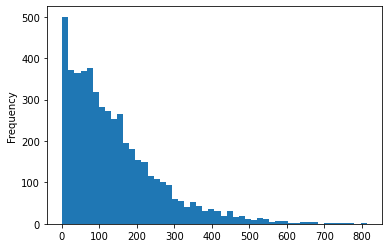

In [179]:
df['num_critic_for_reviews'].plot.hist(bins=50)

In [180]:
df.isna()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,True,True,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False
5039,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
5040,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
5041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


# Preprocessing

In [181]:
df2 = df.dropna(subset = ['num_critic_for_reviews'])

In [182]:
df2 = df2.fillna(df2.mean()).round(1)

In [183]:
X = df2.drop(columns=['num_critic_for_reviews'])
y = df2['num_critic_for_reviews']

In [184]:
# Drop categorical columns
newX = X.copy()
for i in range(X.shape[1]):
  if X.dtypes[i] == 'object':
    newX.drop(columns=X.columns[i], inplace=True)

In [185]:
newX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4993 entries, 0 to 5042
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   duration                   4993 non-null   float64
 1   director_facebook_likes    4993 non-null   float64
 2   actor_3_facebook_likes     4993 non-null   float64
 3   actor_1_facebook_likes     4993 non-null   float64
 4   gross                      4993 non-null   float64
 5   num_voted_users            4993 non-null   int64  
 6   cast_total_facebook_likes  4993 non-null   int64  
 7   facenumber_in_poster       4993 non-null   float64
 8   num_user_for_reviews       4993 non-null   float64
 9   budget                     4993 non-null   float64
 10  title_year                 4993 non-null   float64
 11  actor_2_facebook_likes     4993 non-null   float64
 12  imdb_score                 4993 non-null   float64
 13  aspect_ratio               4993 non-null   float

In [186]:
X_train,X_test,y_train,y_test=train_test_split(newX,y,test_size=0.3)

In [187]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3495 entries, 3606 to 1716
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   duration                   3495 non-null   float64
 1   director_facebook_likes    3495 non-null   float64
 2   actor_3_facebook_likes     3495 non-null   float64
 3   actor_1_facebook_likes     3495 non-null   float64
 4   gross                      3495 non-null   float64
 5   num_voted_users            3495 non-null   int64  
 6   cast_total_facebook_likes  3495 non-null   int64  
 7   facenumber_in_poster       3495 non-null   float64
 8   num_user_for_reviews       3495 non-null   float64
 9   budget                     3495 non-null   float64
 10  title_year                 3495 non-null   float64
 11  actor_2_facebook_likes     3495 non-null   float64
 12  imdb_score                 3495 non-null   float64
 13  aspect_ratio               3495 non-null   fl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4abfe78610>,
      dtype=object)

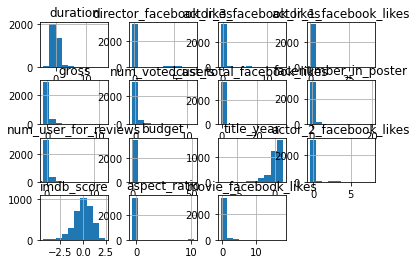

In [188]:
scaler=preprocessing.StandardScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),columns=newX.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=newX.columns)
X_train.hist()

In [189]:
train=X_train.copy()
train['target']=y_train
train.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,target
0,-0.376998,-0.237807,-0.175579,-0.358932,-0.591384,-0.587146,-0.355016,-0.658853,-0.581987,-0.156209,-0.612863,-0.323091,-0.326312,-0.323420,-0.347593,723.0
1,-0.257149,-0.232879,-0.192668,-0.390066,-0.267160,-0.393423,-0.412743,-0.658853,-0.317666,-0.160492,0.941995,-0.356519,-1.319823,-0.323420,0.127918,302.0
2,-0.097351,-0.251185,-0.363554,-0.358932,-0.756781,-0.444216,-0.457345,1.256545,-0.533229,-0.066267,0.532822,-0.409661,0.667199,0.137353,-0.399548,602.0
3,-1.335786,-0.079739,0.094178,0.530618,2.234012,3.821282,0.506808,-0.180004,0.287964,-0.053419,-0.612863,-0.173094,1.660710,-0.323420,-0.399548,NaN
4,-0.696594,-0.251185,4.487181,0.467079,-0.067663,0.811917,1.351967,-0.658853,0.626705,-0.061984,-0.121855,2.398291,0.125284,0.137353,-0.399548,NaN


In [190]:
train.corr()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,target
duration,1.000000,0.135143,0.112820,0.085440,0.193100,0.297358,0.118630,0.019600,0.315951,0.058148,-0.120466,0.144600,0.261747,-0.063446,0.174650,-0.016825
director_facebook_likes,0.135143,1.000000,0.106601,0.082888,0.128836,0.295638,0.108399,-0.032824,0.216138,0.016011,-0.072246,0.121132,0.172885,0.001575,0.149964,0.058513
actor_3_facebook_likes,0.112820,0.106601,1.000000,0.255859,0.306594,0.288098,0.478086,0.126754,0.229311,0.036671,0.099054,0.653762,0.042054,-0.001618,0.280574,0.003995
actor_1_facebook_likes,0.085440,0.082888,0.255859,1.000000,0.133218,0.190107,0.957973,0.086830,0.137744,0.013801,0.086363,0.336798,0.083103,-0.017113,0.126916,-0.023029
gross,0.193100,0.128836,0.306594,0.133218,1.000000,0.630012,0.221508,-0.018609,0.543538,0.075209,0.002881,0.288562,0.177144,0.013092,0.342781,0.006560
num_voted_users,0.297358,0.295638,0.288098,0.190107,0.630012,1.000000,0.265969,-0.023864,0.792985,0.063668,0.001377,0.312987,0.425557,-0.013002,0.517953,0.006677
cast_total_facebook_likes,0.118630,0.108399,0.478086,0.957973,0.221508,0.265969,1.000000,0.113928,0.200645,0.024411,0.110434,0.571012,0.092602,-0.015790,0.201905,-0.019100
facenumber_in_poster,0.019600,-0.032824,0.126754,0.086830,-0.018609,-0.023864,0.113928,1.000000,-0.065046,-0.018749,0.089422,0.105362,-0.068036,0.010964,0.025149,-0.006146
num_user_for_reviews,0.315951,0.216138,0.229311,0.137744,0.543538,0.792985,0.200645,-0.065046,1.000000,0.065981,-0.008632,0.251499,0.299708,-0.020775,0.366949,-0.004912
budget,0.058148,0.016011,0.036671,0.013801,0.075209,0.063668,0.024411,-0.018749,0.065981,1.000000,0.036987,0.037002,0.029863,0.002264,0.046715,0.009945


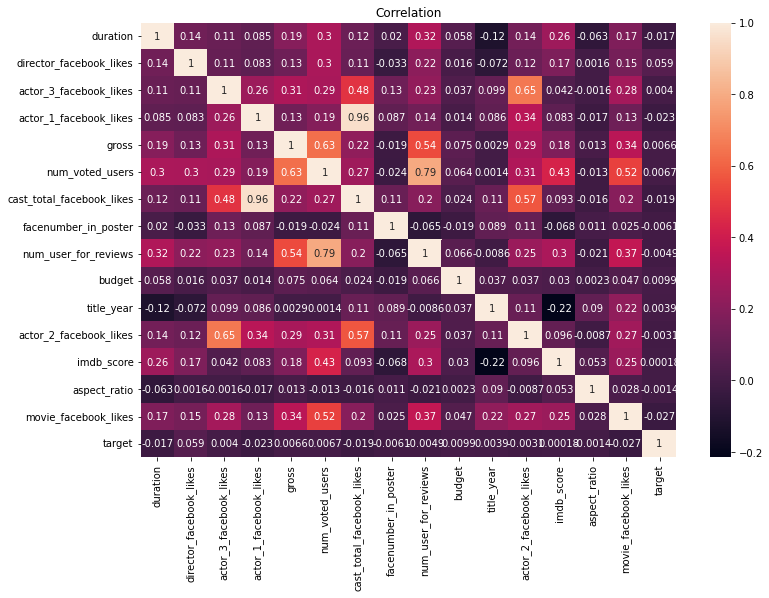

In [191]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)
plt.title("Correlation")
plt.show()

**Correlation Results:**
We can see that all non-categorical features are weakly correlated with the target, so we only cut out features that are autocorrelated.

The autocorrelations are:
*   `actor_3_facebook_likes` and `actor_2_facebook_likes`
*   `actor_1_facebook_likes` and `cast_total_facebook_likes`
*   `gross` and `num_voted_users`
*   `gross` and `num_user_for_reviews`
*   `num_voted_users` and `num_user_for_reviews`
*   `num_voted_users` and `movie_facebook_likes`
*   `cast_total_facebook_likes` and `actor_2_facebook_likes`

We can see from the presented data can be grouped into two bins in autocorrelation as:
*   `{ actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes, cast_total_facebook_likes }`
*   `{ gross, num_voted_users, num_user_for_reviews, movie_facebook_likes }`

We will pick the most logical representative of each group, which is `cast_total_facebook_likes` and `gross`. All other columns with autocorrelation will be deleted.


In [192]:
newXTrain = X_train.drop(columns=['actor_1_facebook_likes', \
                               'actor_2_facebook_likes', \
                               'actor_3_facebook_likes', \
                               'num_voted_users', \
                               'num_user_for_reviews', \
                               'movie_facebook_likes'])

In [193]:
newXTest = X_test.drop(columns=['actor_1_facebook_likes', \
                               'actor_2_facebook_likes', \
                               'actor_3_facebook_likes', \
                               'num_voted_users', \
                               'num_user_for_reviews', \
                               'movie_facebook_likes'])

In [194]:
newXTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   duration                   3495 non-null   float64
 1   director_facebook_likes    3495 non-null   float64
 2   gross                      3495 non-null   float64
 3   cast_total_facebook_likes  3495 non-null   float64
 4   facenumber_in_poster       3495 non-null   float64
 5   budget                     3495 non-null   float64
 6   title_year                 3495 non-null   float64
 7   imdb_score                 3495 non-null   float64
 8   aspect_ratio               3495 non-null   float64
dtypes: float64(9)
memory usage: 245.9 KB


# Modeling

In [195]:
clf = SGDRegressor()
clf.fit(newXTrain, y_train)

SGDRegressor()

In [196]:
y_train_pred=pd.DataFrame(clf.predict(newXTrain))
y_test_pred=pd.DataFrame(clf.predict(newXTest))

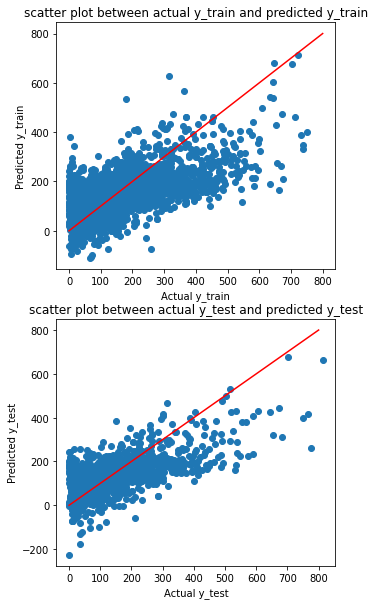

In [197]:
fig,(ax1, ax2)=plt.subplots(2,1,figsize=(5,10))
ax1.scatter(y_train,y_train_pred)
ax1.plot([0, 800], [0, 800], 'r')
ax1.set_xlabel('Actual y_train')
ax1.set_ylabel('Predicted y_train')
ax1.set_title('scatter plot between actual y_train and predicted y_train')
ax2.scatter(y_test,y_test_pred)
ax2.plot([0, 800], [0, 800], 'r')
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and predicted y_test')
plt.show()

In [198]:
print('Mean Absolute Error is:\n',metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error is:\n',metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Absolute Percentage Error is:\n',metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('Coefficient of Determination (R^2) is:\n',metrics.r2_score(y_test, y_test_pred))
print('Adjusted Coefficient of Determination (Adjusted R^2) is:\n',1-(1-metrics.r2_score(y_test, y_test_pred))*(len(X_test)-1)/(len(X_test)-13-1))


Mean Absolute Error is:
 70.17595643063927
Mean Squared Error is:
 8652.820103394892
Mean Absolute Percentage Error is:
 3.4222530959987973
Coefficient of Determination (R^2) is:
 0.40288451933722214
Adjusted Coefficient of Determination (Adjusted R^2) is:
 0.39765372334758864


In [199]:
for i in range(newXTrain.shape[1]):
    print(newXTrain.columns[i], 'has coefficient equal to:\n', clf.coef_[i])
print('The intercept is', clf.intercept_)

duration has coefficient equal to:
 16.005727278667116
director_facebook_likes has coefficient equal to:
 9.916179170707814
gross has coefficient equal to:
 40.57332888015658
cast_total_facebook_likes has coefficient equal to:
 10.08703313135948
facenumber_in_poster has coefficient equal to:
 -5.291536715143435
budget has coefficient equal to:
 8.142502500704271
title_year has coefficient equal to:
 42.858896232095915
imdb_score has coefficient equal to:
 32.57796835671462
aspect_ratio has coefficient equal to:
 -10.021578992601851
The intercept is [142.00372967]
